<h2 id="problem_statement">1. Problem Statement</h2>

Uncover the factors that affect Diamond prices.

### What is the major factors affecting house rent prices

To predict Diamond prices

### Import the dataset

This dataset was hosted on Kaggle. Click <a href="https://www.kaggle.com/datasets/shivam2503/diamonds">HERE</a>.


## Diamond data information
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.

Feature description:

price price in US dollars ($326--$18,823)This is the target column containing tags for the features. 

The 4 Cs of Diamonds:-

carat (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

cut (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

color, from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

Dimensions

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

Let's load required libraries

In [1]:
#!pip install xgboost

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import sklearn.tree as tree
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pylab as pl
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Load our dataset

In [6]:
df = pd.read_csv("C:/Users/17018/OneDrive - Nigerian National Petroleum Corporation/Desktop/EXCEL_practice/CSV/Diamonds Prices2022.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Lets drop the Unnamed Column

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
df.shape

(53943, 10)

In [10]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [11]:
df.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Points to notice:

Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [12]:
#Dropping dimentionless diamonds
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53923, 10)

In [13]:
df.describe(include='object')

,cut,color,clarity
count,53923,53923,53923
unique,5,7,8
top,Ideal,G,SI1
freq,21548,11284,13065


In [14]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [15]:
df['price'].max()

18823

## Numeric Distribution

In [16]:
numCols = df.select_dtypes([np.number]).columns.drop("price")
numCols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

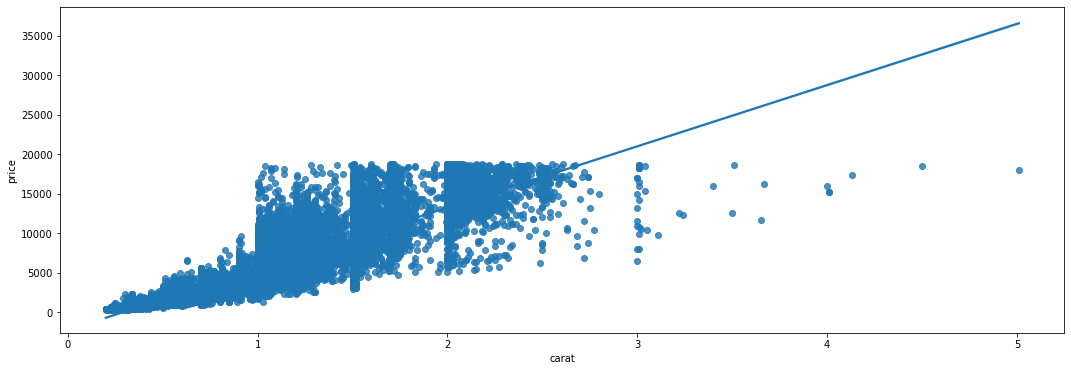

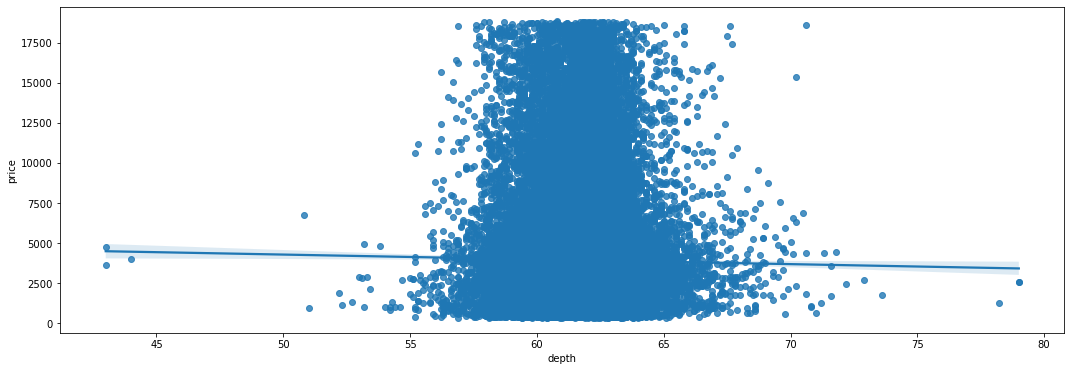

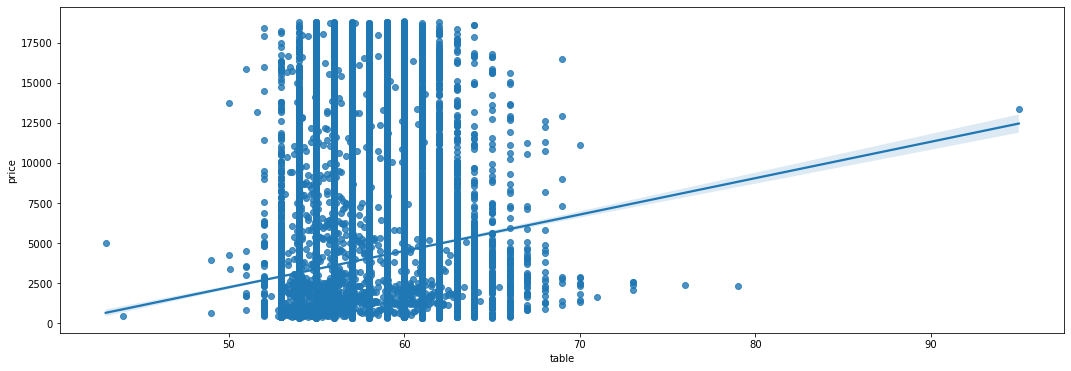

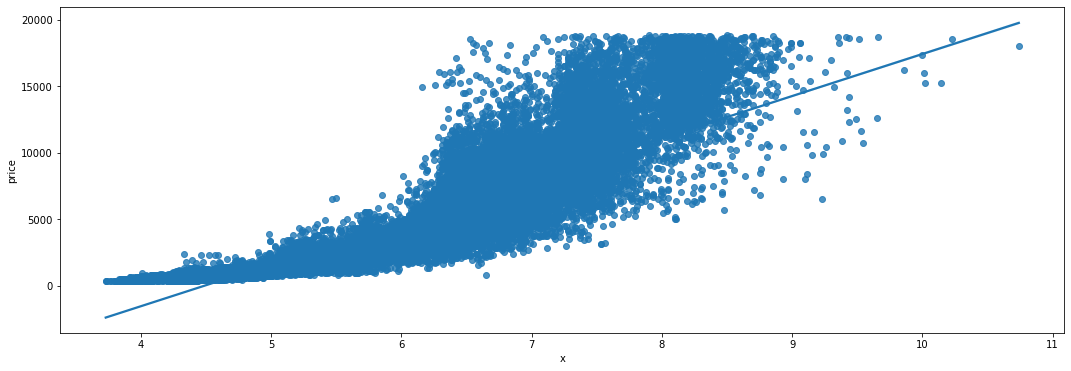

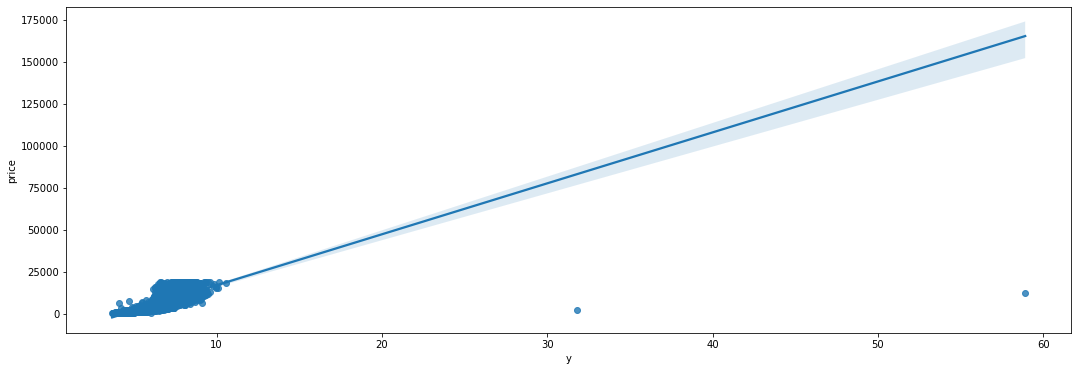

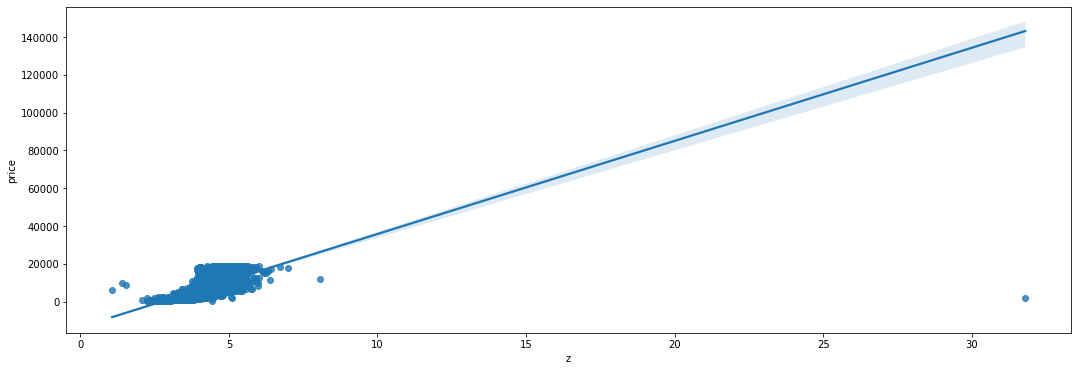

In [17]:
for col in numCols:
    plt.figure(figsize=(18,6))
    sns.regplot(x=col, y="price", data=df)
    plt.show()

### Lets Check for  Outliers using boxplots

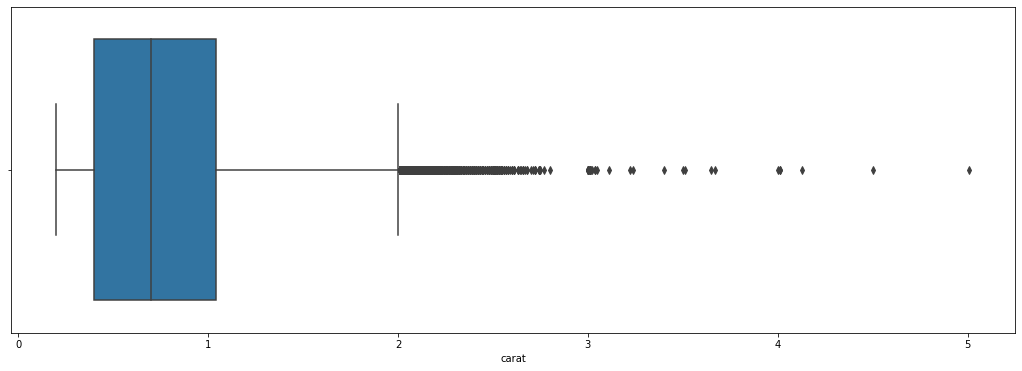

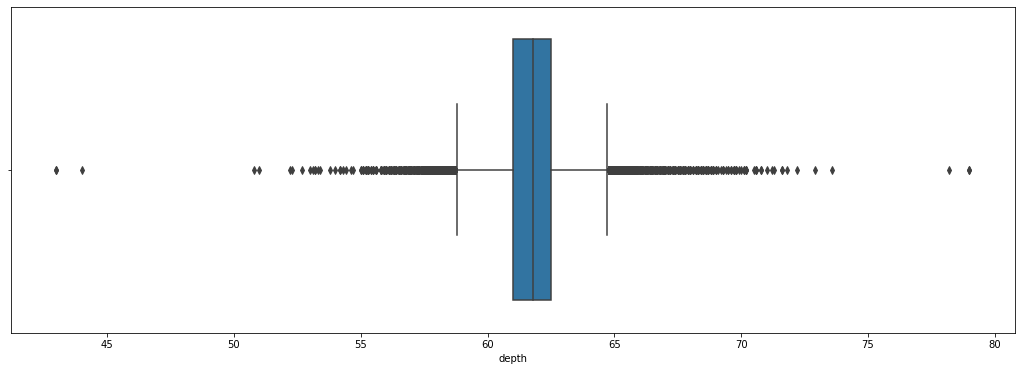

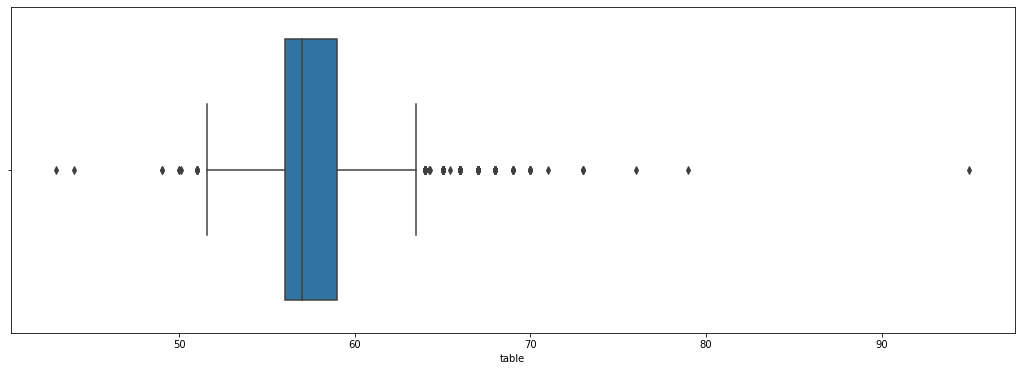

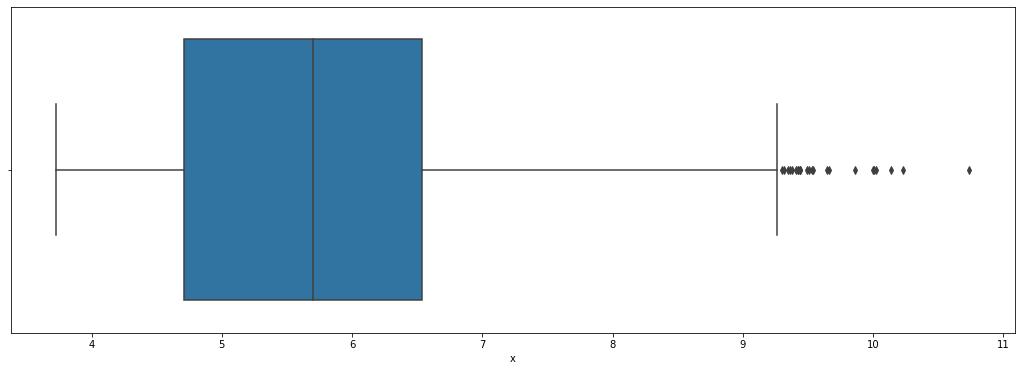

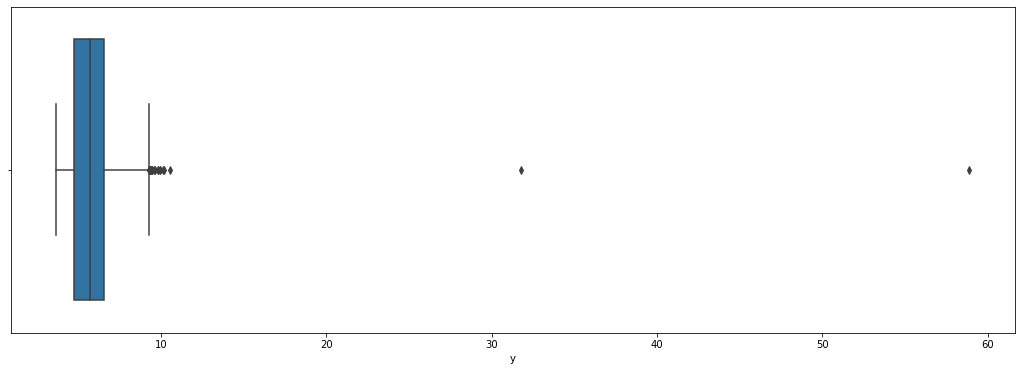

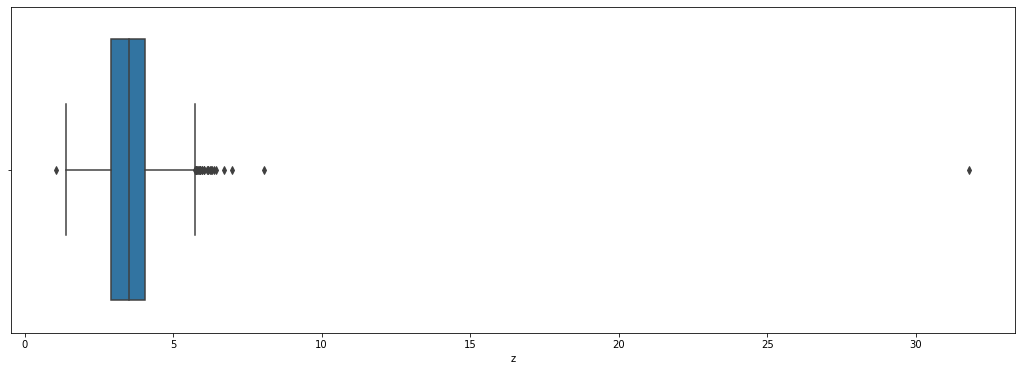

In [18]:
for col in numCols:
    plt.figure(figsize=(18,6))
    sns.boxplot(x=col, data=df)
    plt.show()

We can clearly spot outliers in these attributes. Next up, we will remove these data points.

In [19]:
# Removing outliers
q1 = df['carat'].quantile(0.25)
q3 = df['carat'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'carat'] > toprange:
        df.loc[i, 'carat'] = toprange
    if df.loc[i, 'carat'] < botrange:
        df.loc[i, 'carat'] = botrange

Text(0.5, 1.0, 'Cleaning values')

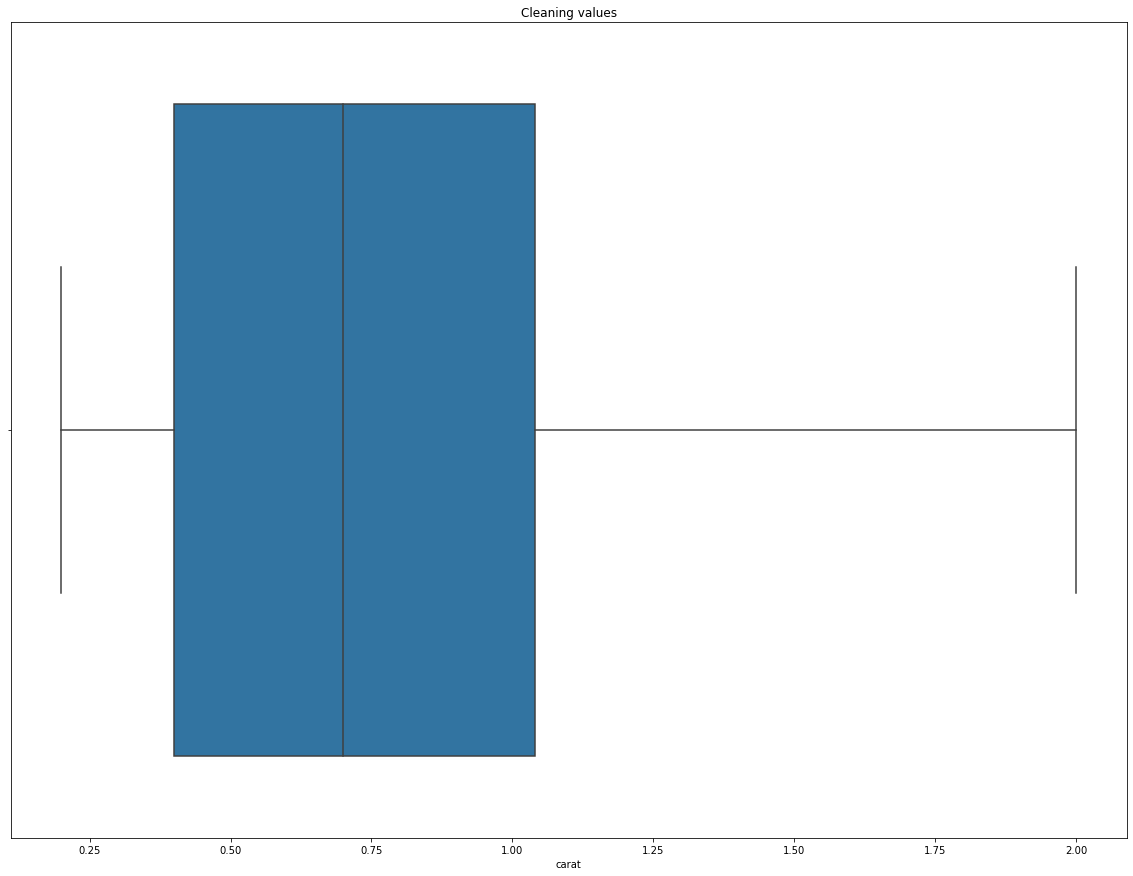

In [20]:
# Carat column after cleaning
plt.figure(figsize=(20, 15))
sns.boxplot(df['carat'], labels=['carat'])
plt.title('Cleaning values')

In [21]:
# Removing outliers
q1 = df['depth'].quantile(0.25)
q3 = df['depth'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'depth'] > toprange:
        df.loc[i, 'depth'] = toprange
    if df.loc[i, 'depth'] < botrange:
        df.loc[i, 'depth'] = botrange

Text(0.5, 1.0, 'Cleaning values')

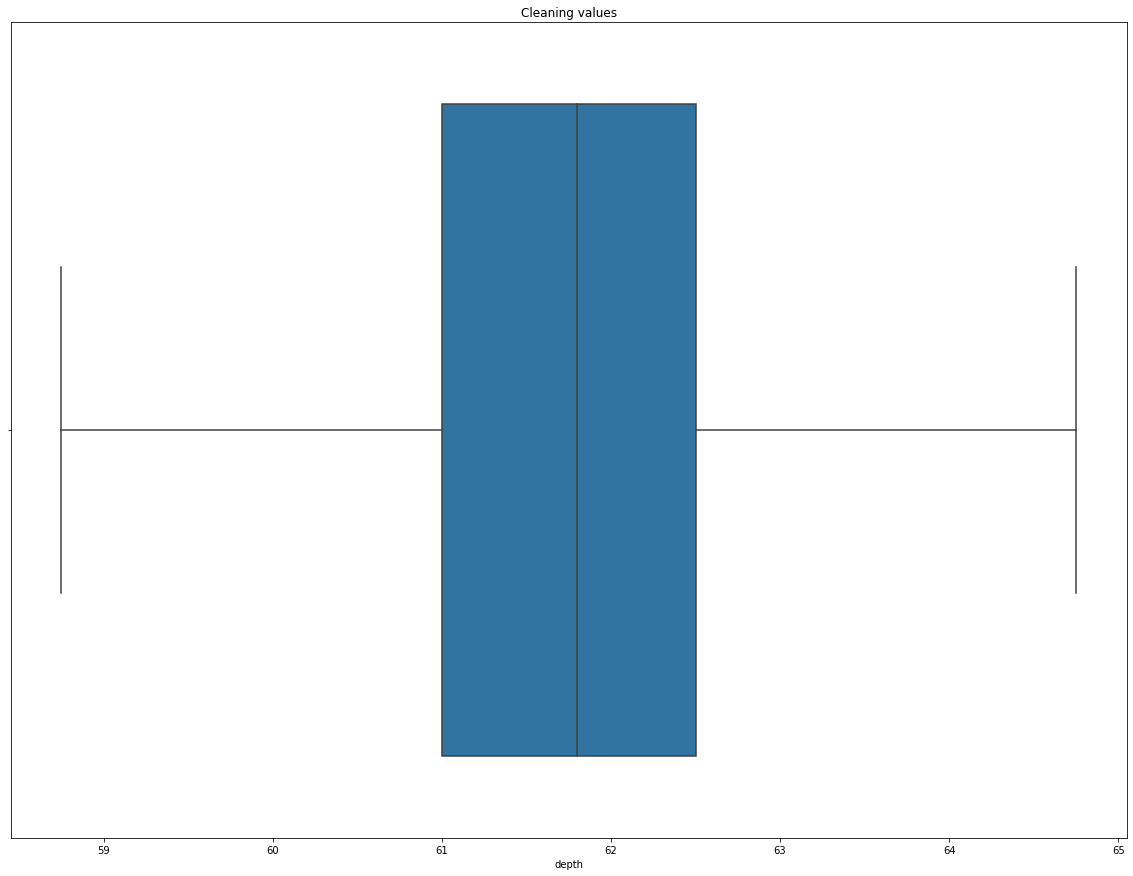

In [22]:
# Depth column after cleaning
plt.figure(figsize=(20, 15))
sns.boxplot(df['depth'], labels=['depth'])
plt.title('Cleaning values')

In [23]:
# Removing outliers
q1 = df['table'].quantile(0.25)
q3 = df['table'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'table'] > toprange:
        df.loc[i, 'table'] = toprange
    if df.loc[i, 'table'] < botrange:
        df.loc[i, 'table'] = botrange

Text(0.5, 1.0, 'Cleaning values')

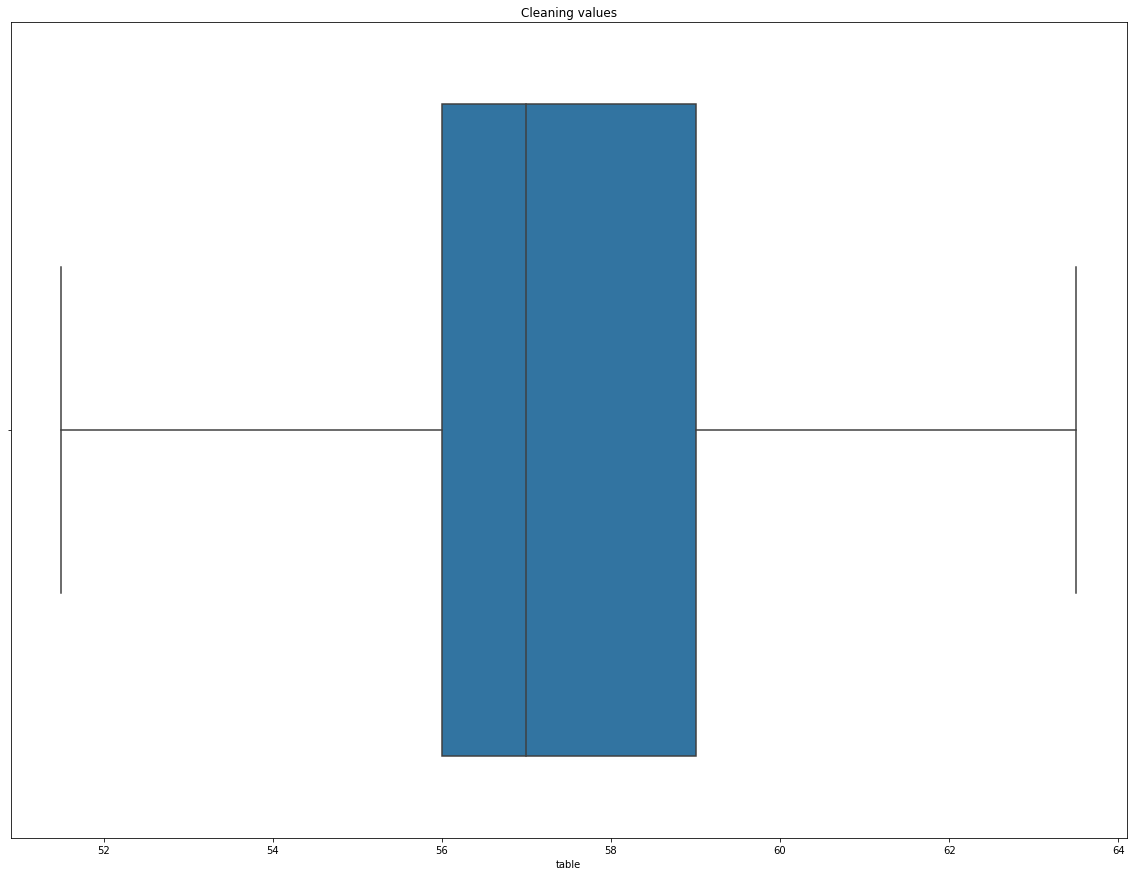

In [24]:
# Table column after cleaning
plt.figure(figsize=(20, 15))
sns.boxplot(df['table'], labels=['table'])
plt.title('Cleaning values')

In [25]:
# Removing outliers
q1 = df['x'].quantile(0.25)
q3 = df['x'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'x'] > toprange:
        df.loc[i, 'x'] = toprange
    if df.loc[i, 'x'] < botrange:
        df.loc[i, 'x'] = botrange

Text(0.5, 1.0, 'Cleaning values')

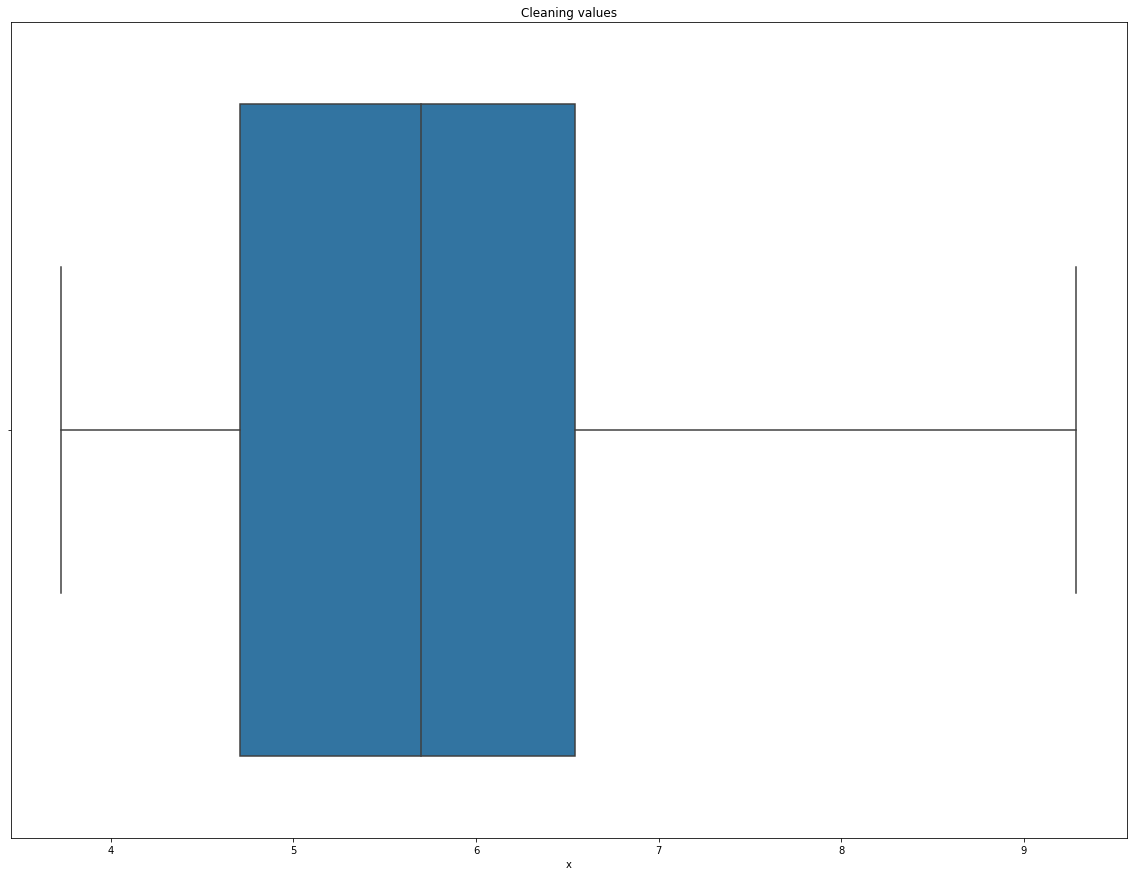

In [26]:
# X column after cleaning
plt.figure(figsize=(20, 15))
sns.boxplot(df['x'], labels=['x'])
plt.title('Cleaning values')

In [27]:
# Removing outliers
q1 = df['y'].quantile(0.25)
q3 = df['y'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'y'] > toprange:
        df.loc[i, 'y'] = toprange
    if df.loc[i, 'y'] < botrange:
        df.loc[i, 'y'] = botrange

Text(0.5, 1.0, 'Cleaning values')

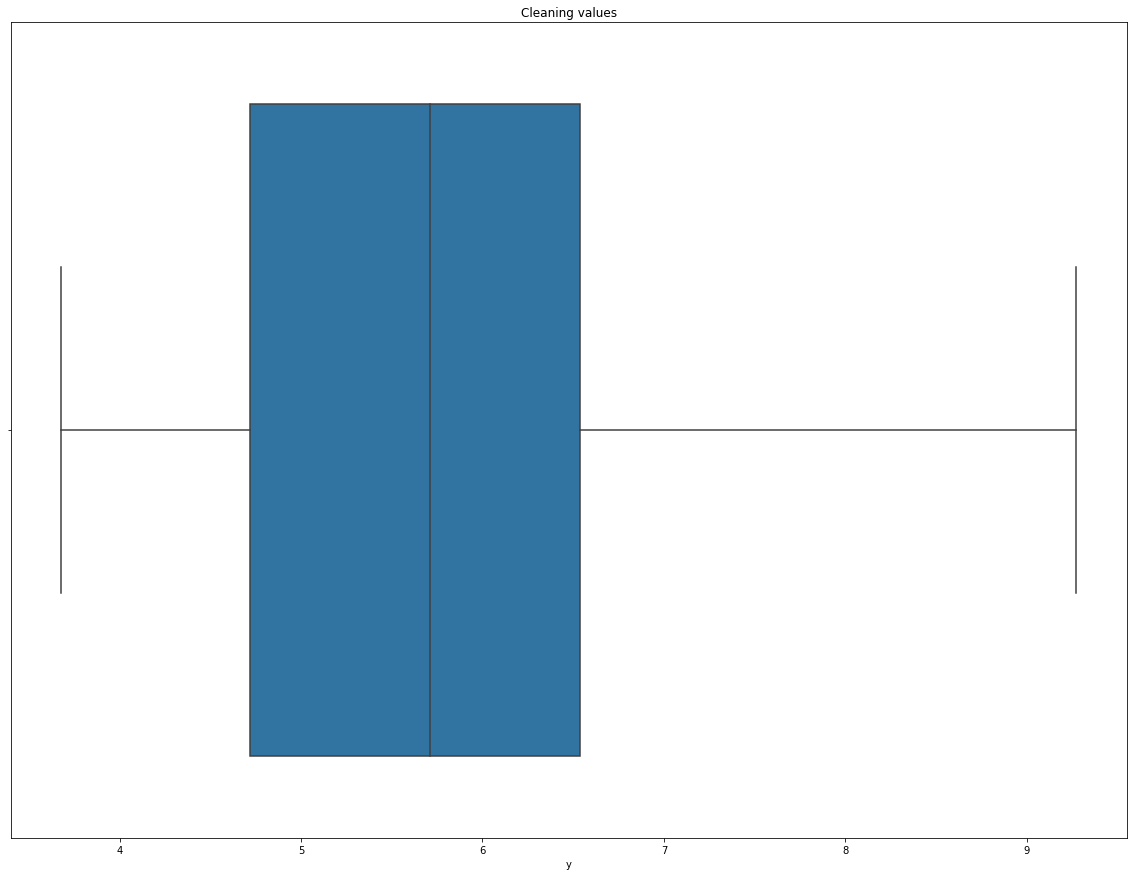

In [28]:
# Y column after cleaning
plt.figure(figsize=(20, 15))
sns.boxplot(df['y'], labels=['y'])
plt.title('Cleaning values')

In [29]:
# Removing outliers
q1 = df['z'].quantile(0.25)
q3 = df['z'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'z'] > toprange:
        df.loc[i, 'z'] = toprange
    if df.loc[i, 'z'] < botrange:
        df.loc[i, 'z'] = botrange

Text(0.5, 1.0, 'Cleaning values')

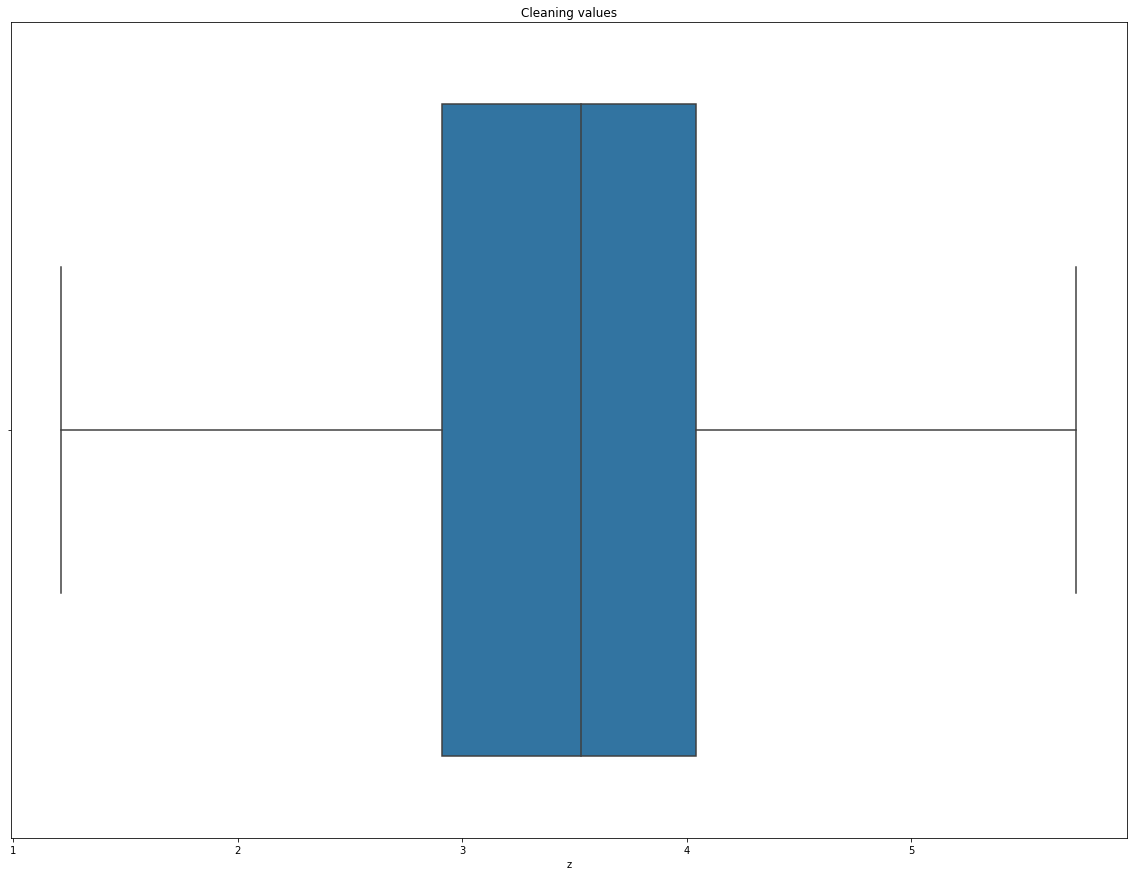

In [30]:
# Z column after cleaning
plt.figure(figsize=(20, 15))
sns.boxplot(df['z'], labels=['z'])
plt.title('Cleaning values')

In [31]:
df.shape

(53923, 10)

### Another method of removing outliers

In [32]:
#Dropping the outliers. 
#df = df[(df["depth"]<75)&(df["depth"]>45)]
#df = df[(df["table"]<80)&(df["table"]>40)]
#df = df[(df["x"]<30)]
#df = df[(df["y"]<30)]
#df = df[(df["z"]<30)&(df["z"]>2)]
#df.shape

### Categorical Count Plot

In [33]:
objCols = df.select_dtypes(['object']).columns
objCols

Index(['cut', 'color', 'clarity'], dtype='object')

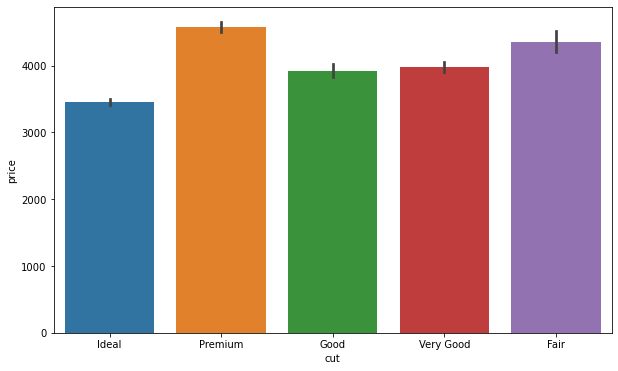

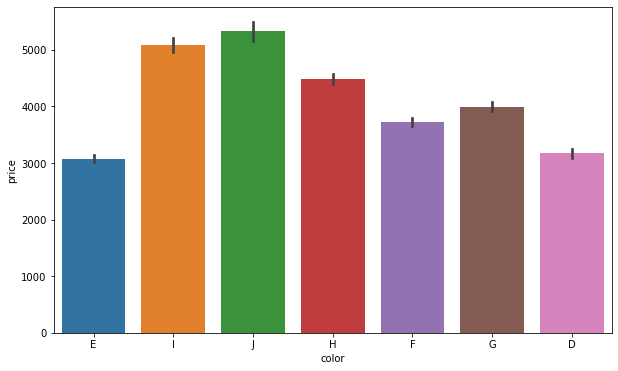

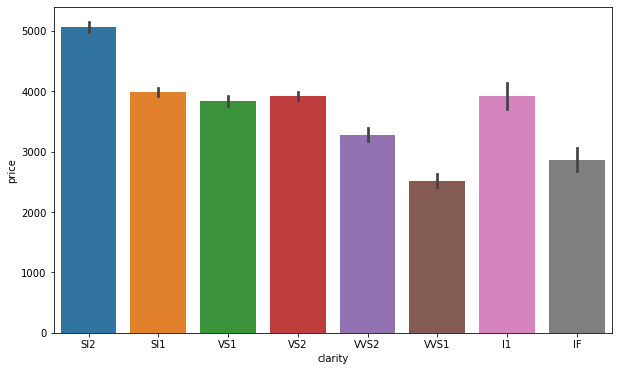

In [34]:
for col in objCols:
    plt.figure(figsize=(10,6))
    sns.barplot(x=col, y="price", data=df)
    plt.show()

In [35]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.021929,0.187534,0.922513,0.983206,0.982334,0.981521
depth,0.021929,1.000000,-0.299964,-0.012604,-0.028632,-0.031343,0.090024
table,0.187534,-0.299964,1.000000,0.130492,0.198704,0.192792,0.158965
price,0.922513,-0.012604,0.130492,1.000000,0.887232,0.888705,0.882006
x,0.983206,-0.028632,0.198704,0.887232,1.000000,0.998519,0.990926
y,0.982334,-0.031343,0.192792,0.888705,0.998519,1.000000,0.990661
z,0.981521,0.090024,0.158965,0.882006,0.990926,0.990661,1.000000


 x=lenght, y= width, z=height
 color D= Best, J= Worst
 depth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
 table%: The width of the diamond's table expressed as a percentage of its average diameter

In [36]:
# Lets make a copy of our dataset as df1
df1 = df.copy()
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,58.75,63.5,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.0,335,4.34,4.35,2.75


### Encode categorical values

In [37]:
label_encoder = LabelEncoder()  # create a label encoder Object

df1['cut'] = label_encoder.fit_transform(df1['cut'])
df1['color'] = label_encoder.fit_transform(df1['color'])
df1['clarity'] = label_encoder.fit_transform(df1['clarity'])

In [38]:
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.50,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.80,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,58.75,63.5,327,4.05,4.07,2.31
3,0.29,3,5,5,62.40,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.30,58.0,335,4.34,4.35,2.75


### Correlation

<AxesSubplot:>

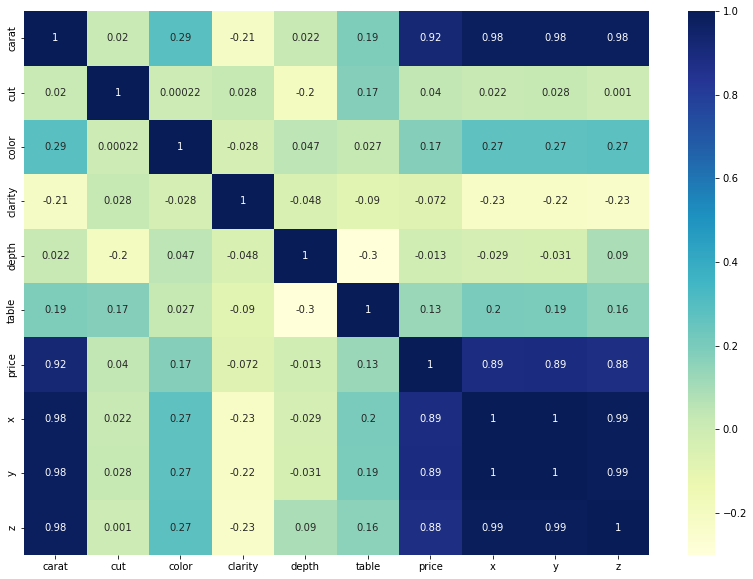

In [39]:
plt.figure(figsize = (14,10))
sns.heatmap(df1.corr() , annot = True , cmap = "YlGnBu")

### Feature Selection
less than 5% not accepted as a feature but lets allow all 

In [40]:
round(abs(df1.corr()['price']*100).sort_values(ascending=False), 2)

price      100.00
carat       92.25
y           88.87
x           88.72
z           88.20
color       17.24
table       13.05
clarity      7.16
cut          3.99
depth        1.26
Name: price, dtype: float64

<AxesSubplot:>

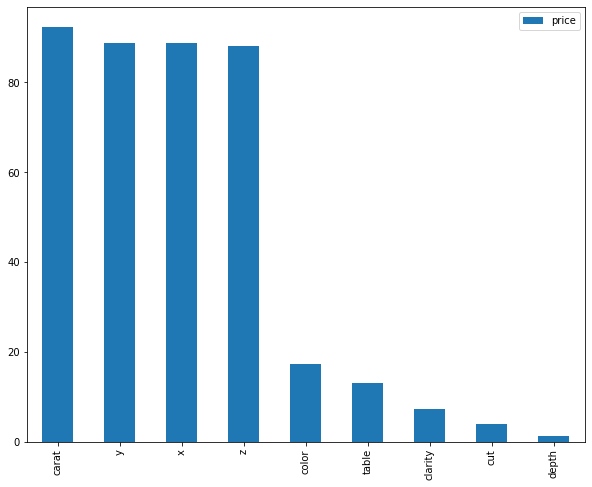

In [41]:
pd.DataFrame(abs(df1.corr()['price'].drop('price')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8))

### Modeling

### 1. Using Linear Regression
* Multiple Linear Regression

In [42]:
columns = ['carat','y','x','z','color','table','clarity','cut','depth']
X = df1[columns]
y = df1[['price']]

In [43]:
# Standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X =pd.DataFrame(X,columns=columns)
X.head()

,carat,y,x,z,color,table,clarity,cut,depth
0,-1.230669,-1.578320,-1.592285,-1.605091,-0.936940,-1.128365,-0.484419,-0.538219,-0.196184
1,-1.274439,-1.704339,-1.645913,-1.778715,-0.936940,1.648195,-1.064288,0.434837,-1.534805
2,-1.230669,-1.497307,-1.502904,-1.778715,-0.936940,2.805094,0.095449,-1.511275,-2.361600
3,-1.099361,-1.353284,-1.368833,-1.315718,1.414288,0.259915,0.675318,0.434837,0.512497
4,-1.055591,-1.245267,-1.243700,-1.142095,2.002095,0.259915,-0.484419,-1.511275,1.221179


### Training and Test Sets

In [44]:
# Create a training and testing dataset with 30% test set

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [45]:
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 16177
number of training samples: 37746


In [46]:
# Creating a linear Regression Object
lre=LinearRegression()

In [47]:
lre.fit(x_train[columns], y_train)

LinearRegression()

Prediction using training data:

In [48]:
yhat_train = lre.predict(x_train[columns])
yhat_train[:5]

array([[4508.67882428],
       [ -77.67525425],
       [4823.34983871],
       [1533.78094707],
       [ 163.57363759]])

Prediction using test data:

In [49]:
yhat_test = lre.predict(x_test[columns])
yhat_test[:5]

array([[4370.88468144],
       [ -50.92186584],
       [1198.80054005],
       [1861.29561621],
       [6514.12510053]])

In [50]:
# Libraries for plotting
from ipywidgets import interact, interactive, fixed, interact_manual

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Diamond')

    plt.show()
    plt.close()
    

def PollyPlot(xtrain, xtest, y_train, y_test, lre,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lre:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

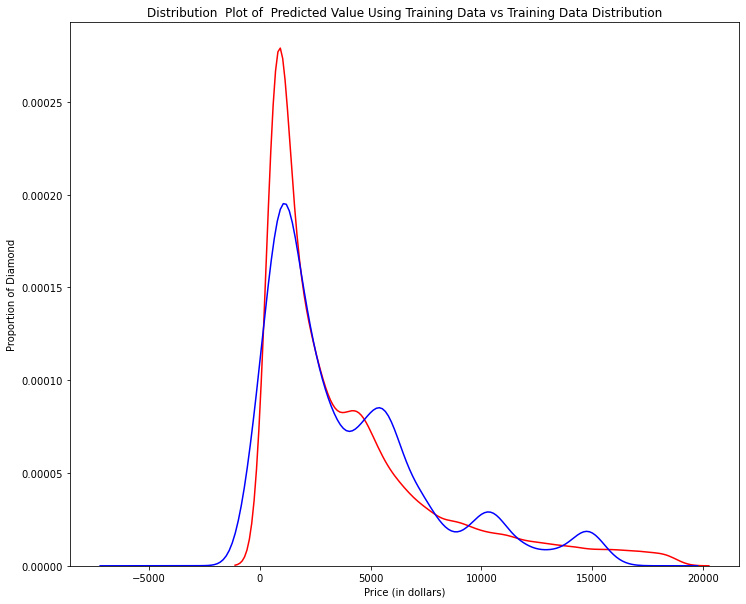

In [51]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.
* So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values

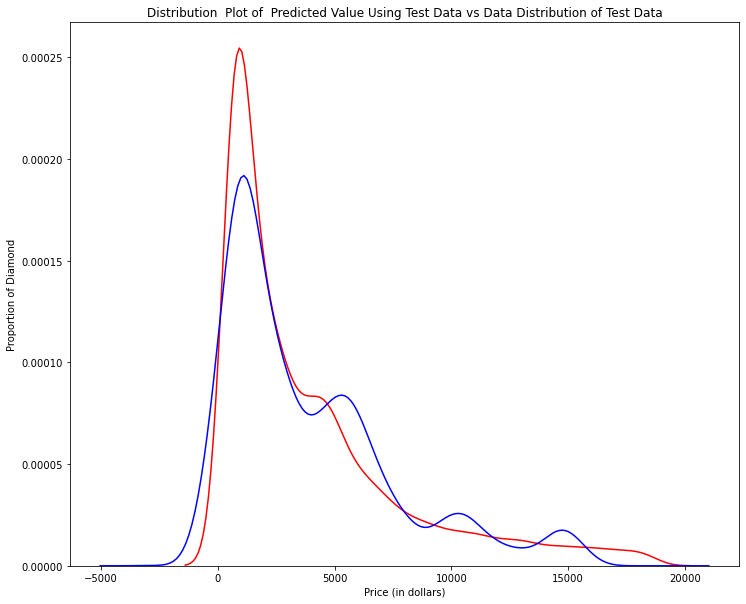

In [52]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.

* Comparing Figure 1 and Figure 2, they show similarity

In [53]:
mean_squared_error(y_train,yhat_train)

1631991.3715930462

In [54]:
mean_squared_error(y_test,yhat_test)

1706121.0024696633

In [55]:
lre.score(x_train,y_train)

0.8973001349790091

In [56]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(x_train, y_train)

In [57]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1277.810002 
DecisionTree: -783.822250 
RandomForest: -566.453775 
KNeighbors: -825.865140 
XGBRegressor: -558.681649 


Testing the Model with the best score on the test set

In the above scores, XGBClassifier appears to be the model with the best scoring on negative root mean square error. Let's test this model on a test set and evaluate it with different parameters.

In [58]:
# Model prediction on test data using XGBOOST
pred = pipeline_xgb.predict(x_test)

In [59]:
# Model Evaluation XGBClassifier
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.982142742505441
Adjusted R^2: 0.9821328015567522
MAE: 275.7306636148384
MSE: 284144.9910214279
RMSE: 533.0525218225948


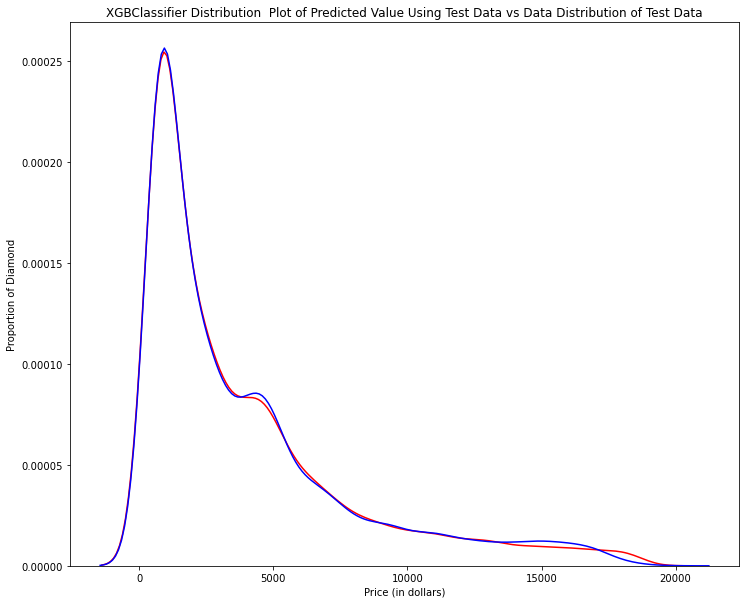

In [60]:
Title='XGBClassifier Distribution  Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,pred,"Actual Values (Test)","Predicted Values (Test)",Title)

In [61]:
predr = pipeline_rf.predict(x_test)

In [62]:
# Model Evaluation Random Forest Regressor
print("R^2:",metrics.r2_score(y_test, predr))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predr))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predr))
print("MSE:",metrics.mean_squared_error(y_test, predr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predr)))

R^2: 0.9821347115535798
Adjusted R^2: 0.982124766134144
MAE: 266.96908824183066
MSE: 284272.7796667568
RMSE: 533.1723733153817


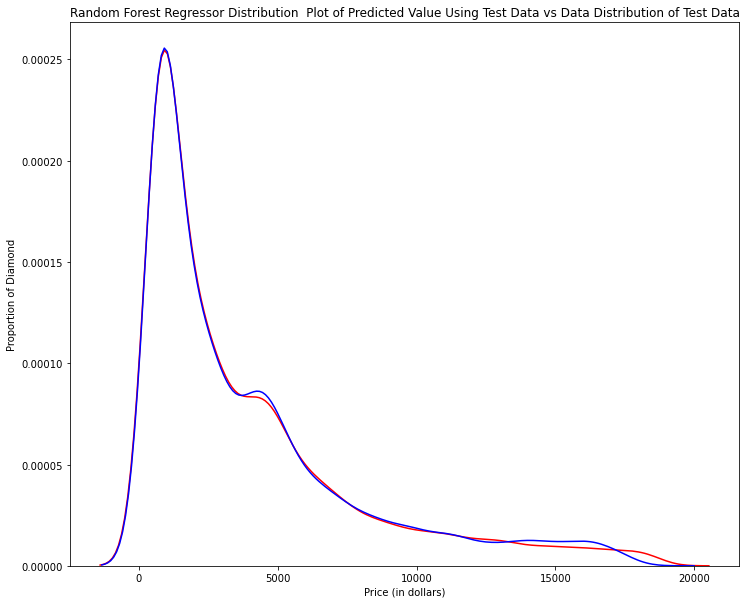

In [63]:
Title='Random Forest Regressor Distribution  Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,predr,"Actual Values (Test)","Predicted Values (Test)",Title)

In [64]:
predl = pipeline_lr.predict(x_test)

In [65]:
# Model Evaluation Linear Regressor
print("R^2:",metrics.r2_score(y_test, predl))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predl))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predl))
print("MSE:",metrics.mean_squared_error(y_test, predl))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predl)))

R^2: 0.8927778316680645
Adjusted R^2: 0.8927181422071263
MAE: 836.8495399060454
MSE: 1706121.002469663
RMSE: 1306.1856692176893


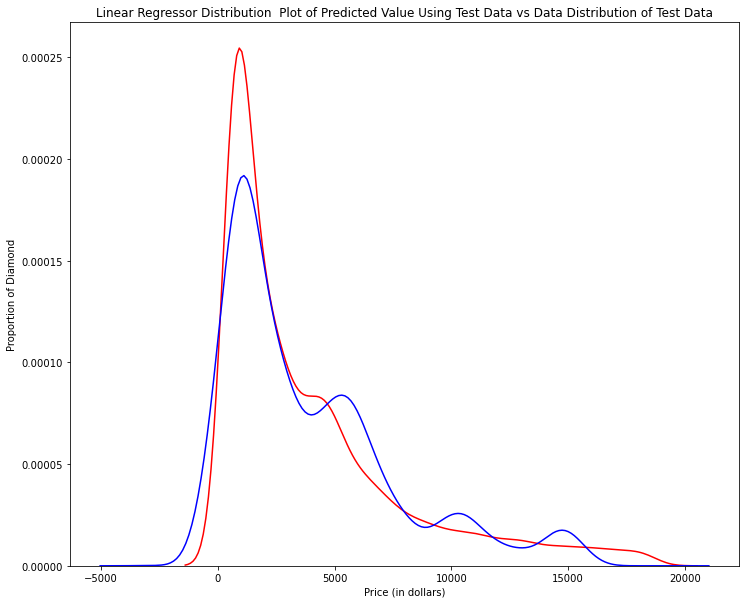

In [66]:
Title='Linear Regressor Distribution  Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,predl,"Actual Values (Test)","Predicted Values (Test)",Title)

In [67]:
predt =pipeline_dt.predict(x_test)

In [68]:
# Model Evaluation for Decision Tree Regressor
print("R^2:",metrics.r2_score(y_test, predt))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predt))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predt))
print("MSE:",metrics.mean_squared_error(y_test, predt))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predt)))

R^2: 0.9651528648925618
Adjusted R^2: 0.9651334658565027
MAE: 362.4760771465661
MSE: 554488.2183192186
RMSE: 744.6396566925633


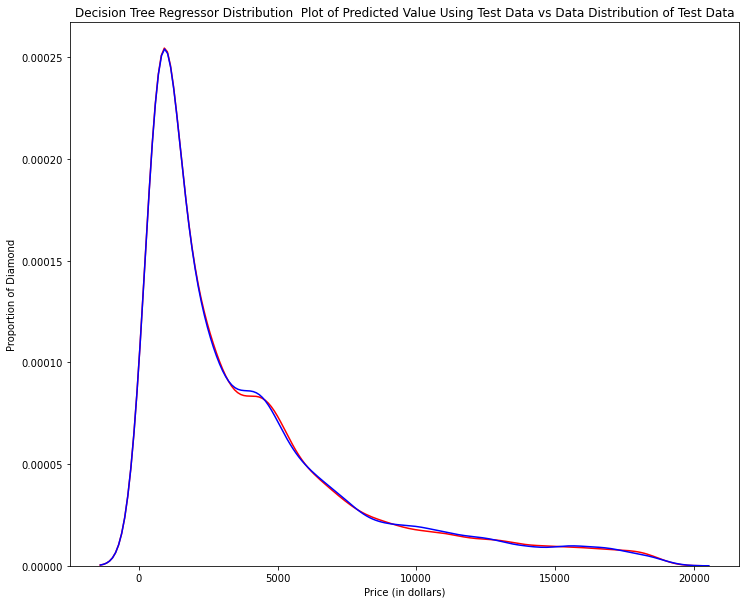

In [69]:
Title='Decision Tree Regressor Distribution  Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,predt,"Actual Values (Test)","Predicted Values (Test)",Title)

In [70]:
predk = pipeline_kn.predict(x_test)

In [71]:
# Model Evaluation for K Neighbor Regressor
print("R^2:",metrics.r2_score(y_test, predk))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, predk))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, predk))
print("MSE:",metrics.mean_squared_error(y_test, predk))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predk)))

R^2: 0.9562257907767289
Adjusted R^2: 0.9562014221317725
MAE: 414.39392965321133
MSE: 696535.976507387
RMSE: 834.5873090979679


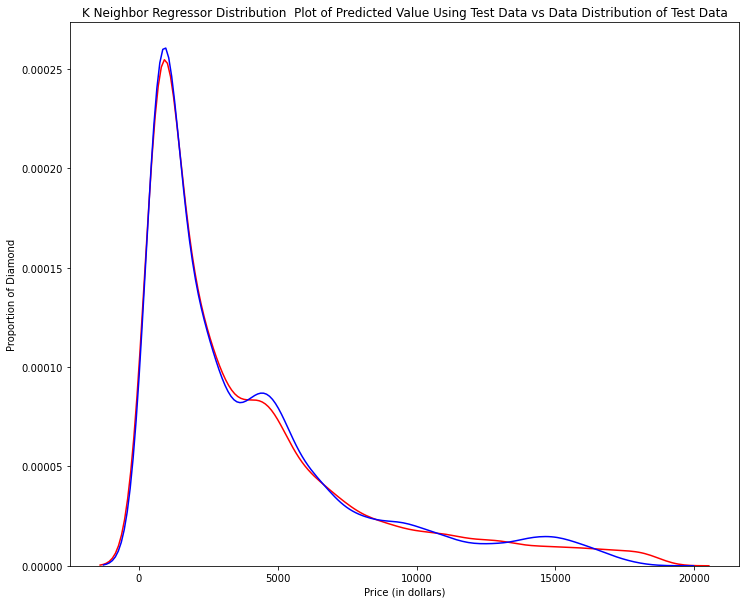

In [72]:
Title='K Neighbor Regressor Distribution  Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,predk,"Actual Values (Test)","Predicted Values (Test)",Title)

In all **XGBOOST REGRESSOR** and **RANDOM FOREST REGRESSOR** are of higher **R SCORE**